In [108]:
# INFO 499
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

# Initial data wrangling
def process_data(dataset, week):
    pd_data = pd.read_csv(dataset)
    pd_data = pd_data.dropna(how='all')
    pd_data['Fields'].str.replace(' ', '')
    pd_data = pd_data.replace(',','', regex=True)
    pd_data = pd_data.replace('-','0', regex=True)
    pd_data['Week'] = week
    return(pd_data)
    
# Evetually turn into function to read in data/ create panda dataframes
# Read in data prior to COVID
wk1SeaPrior = process_data("CSV Files\wk1SeaPrior.csv", "wk1")
wk2SeaPrior = process_data("CSV Files\wk2SeaPrior.csv", "wk2")
wk3SeaPrior = process_data("CSV Files\wk3SeaPrior.csv", "wk3")
wk4SeaPrior = process_data("CSV Files\wk4SeaPrior.csv", "wk4")
wk5SeaPrior = process_data("CSV Files\wk5SeaPrior.csv", "wk5")
wk6SeaPrior = process_data("CSV Files\wk6SeaPrior.csv", "wk6")
wk7SeaPrior = process_data("CSV Files\wk7SeaPrior.csv", "wk7")

# Read in data during COVID
wk1SeaCovid = process_data("CSV Files\wk1SeaCovid.csv", "wk1")
wk2SeaCovid = process_data("CSV Files\wk2SeaCovid.csv", "wk2")
wk3SeaCovid = process_data("CSV Files\wk3SeaCovid.csv", "wk3")
wk4SeaCovid = process_data("CSV Files\wk4SeaCovid.csv", "wk4")
wk5SeaCovid = process_data("CSV Files\wk5SeaCovid.csv", "wk5")
wk6SeaCovid = process_data("CSV Files\wk6SeaCovid.csv", "wk6")
wk7SeaCovid = process_data("CSV Files\wk7SeaCovid.csv", "wk7")

# Read in data for only Food Insecure Respondents w/ Children
wk1Insufficient = process_data("CSV Food Insecurity\wk1FoodInsecure.csv", "wk1")
wk2Insufficient = process_data("CSV Food Insecurity\wk2FoodInsecure.csv", "wk2")
wk3Insufficient = process_data("CSV Food Insecurity\wk3FoodInsecure.csv", "wk3")
wk4Insufficient = process_data("CSV Food Insecurity\wk4FoodInsecure.csv", "wk4")
wk5Insufficient = process_data("CSV Food Insecurity\wk5FoodInsecure.csv", "wk5")


In [145]:
# Compiled data from first 7 weeks
prior_frames = [wk1SeaPrior, wk2SeaPrior, wk2SeaPrior, wk3SeaPrior, wk4SeaPrior, wk5SeaPrior, wk6SeaPrior, wk7SeaPrior]
prior_compiled = pd.concat(prior_frames)
prior_compiled

covid_frames = [wk1SeaCovid, wk2SeaCovid, wk3SeaCovid, wk4SeaCovid, wk5SeaCovid, wk6SeaCovid, wk7SeaCovid]
covid_compiled =pd.concat(covid_frames)

# Compiled data from April 23-June 2
insufficient_frames = [wk1Insufficient, wk2Insufficient, wk3Insufficient, wk4Insufficient, wk5Insufficient]
insufficient_compiled = pd.concat(insufficient_frames)



,Fields,Total,"Enough food, but not always the types wanted",Sometimes not enough to eat,Often not enough to eat,Did not report,Week
1,Total,309246,238247,59155,9774,2070,wk1
2,Food Sufficiency before Mar 13 2020,NaN,NaN,NaN,NaN,NaN,wk1
3,Enough of the types of food wanted,158765,126105,32660,0,0,wk1
4,Enough food but not always the types wanted,109473,107707,1766,0,0,wk1
5,Sometimes not enough to eat,36126,4434,24730,6963,0,wk1


In [137]:
# Linegraph for percentage of people sometimes or often not having enough food to eat. (Sometimes + Often values) / (Total - did not report) 

# Parsing the dataset for only the fields of 'Total" for each week
prior_total = prior_compiled[prior_compiled["Fields"] == 'Total']
covid_total = covid_compiled[covid_compiled['Fields'] == 'Total']

# Creates a new column that adds the two columns
# Food insecurity is defined in the dataset as the parameters: 
prior_total_sometimes_often = prior_total['Enough food, but not always the types wanted'].astype(int) + prior_total['Sometimes not enough to eat'].astype(int) + prior_total['Often not enough to eat'].astype(int)
prior_total["Total Food Insecure"] = prior_total_sometimes_often

covid_total_sometimes_often = covid_total['Enough food, but not always the types wanted'].astype(int) + covid_total['Sometimes not enough to eat'].astype(int) + covid_total['Often not enough to eat'].astype(int)
covid_total["Total Food Insecure"] = covid_total_sometimes_often

# Creates a column dividing the food insecure population by the total
prior_total_responses = prior_total['Total'].astype(int) - prior_total['Did not report'].astype(int)
prior_total["Total Responses"] = prior_total_responses

covid_total_responses = covid_total['Total'].astype(int) - covid_total['Did not report'].astype(int)
covid_total["Total Responses"] = covid_total_responses


<function matplotlib.pyplot.show(close=None, block=None)>

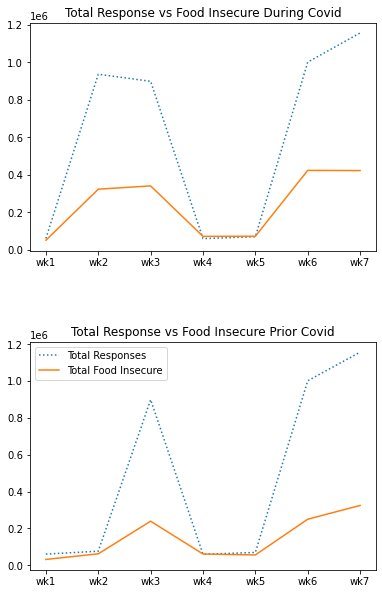

In [138]:
# Create lineplot (Matplotlib)
# Plots each week as the X axis, with the number from the responses column as the Y- Axis
fig, (ax1, ax2) = plt.subplots(2)
ax1.title.set_text('Total Response vs Food Insecure During Covid')
ax2.title.set_text('Total Response vs Food Insecure Prior Covid')
ax1.plot(covid_total["Week"], covid_total["Total Responses"], label = "Total Responses", linestyle=":")
ax2.plot(prior_total["Week"], prior_total["Total Responses"], label = "Total Responses", linestyle=":")

ax1.plot(covid_total["Week"], covid_total["Total Food Insecure"], label = "Total Food Insecure", linestyle="-")
ax2.plot(prior_total["Week"], prior_total["Total Food Insecure"], label = "Total Food Insecure", linestyle="-")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.legend()
plt.show

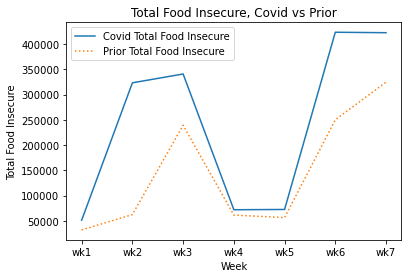

In [144]:
# Total Number of Respondents Food Insecure Prior to Covid vs During Covid
# Compares over the first 7 weeks of the study, the total respondents who are food insecure during covid, compared to asking about their situations prior to covid

plt.plot(covid_total["Week"], covid_total["Total Food Insecure"], label = "Covid Total Food Insecure", linestyle="-")
plt.plot(prior_total["Week"], prior_total["Total Food Insecure"], label = "Prior Total Food Insecure", linestyle=":")
plt.title('Total Food Insecure, Covid vs Prior')
plt.xlabel('Week')
plt.ylabel('Total Food Insecure')
plt.legend()
plt.show()

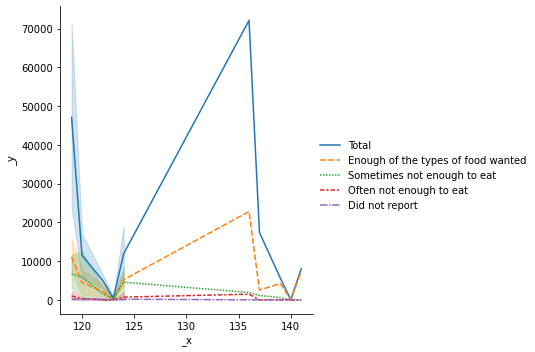

In [112]:
# Lineplot for sources of food support
# I was experimenting with the Seaborn library, which I don't have as much experience utilizing
# Still trying to figure out a method to have the lineplot plot Weeks as the x axis value, instead of the index
# Wrangle Data 

# Filter out only the rows for     
    # School or other programs aimed at children
    # Food pantry or food bank
    # Home-delivered meal service like Meals on Wheels
    # Church, synagogue, temple, mosque or other religious organization
    # Shelter or soup kitchen
    # Other community program
    # Family, friends, or neighbors

mask = ["    School or other programs aimed at children", "    Food pantry or food bank", '    Home-delivered meal service like Meals on Wheels', "    Church synagogue temple mosque or other religious organization", "    Shelter or soup kitchen", "    Other community program"]

# Check whether the fields is contained in the list 'mask'
prior_food_program = prior_compiled[prior_compiled["Fields"].isin(mask)]
covid_food_program = covid_compiled[covid_compiled["Fields"].isin(mask)]

# Change each row into integer values that can be grahped
covid_food_program['Total'] = covid_food_program['Total'].fillna(0).astype(int)
covid_food_program['Enough of the types of food wanted'] = covid_food_program['Enough of the types of food wanted'].fillna(0).astype(int)
covid_food_program['Sometimes not enough to eat'] = covid_food_program['Sometimes not enough to eat'].fillna(0).astype(int)
covid_food_program['Often not enough to eat'] = covid_food_program['Often not enough to eat'].fillna(0).astype(int)
covid_food_program['Did not report'] = covid_food_program['Did not report'].fillna(0).astype(int)

covid_food_program
sns.relplot(data=covid_food_program, kind="line")

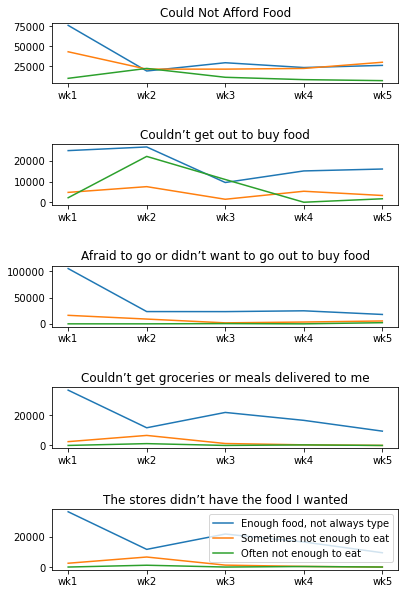

<Figure size 432x288 with 0 Axes>

In [141]:
# Graphing Reasons for food insuficiency
# This graph is mapping each of the reasons why respondents said they have been feeling food insecure over the past week
# Participants were able to select multiple options

mask2 = ['    Couldn’t afford to buy more food', '    Couldn’t get out to buy food', '    Afraid to go or didn’t want to go out to buy food', '    Couldn’t get groceries or meals delivered to me', '    The stores didn’t have the food I wanted']
insufficient_reasons = insufficient_compiled[insufficient_compiled['Fields'].isin(mask2)]

# Changes each row to be type int (Need to add to above data parsing)
insufficient_reasons['Total'] = insufficient_reasons['Total'].fillna(0).astype(int)
insufficient_reasons['Enough food, but not always the types wanted'] = insufficient_reasons['Enough food, but not always the types wanted'].fillna(0).astype(int)
insufficient_reasons['Sometimes not enough to eat'] = insufficient_reasons['Sometimes not enough to eat'].fillna(0).astype(int)
insufficient_reasons['Often not enough to eat'] = insufficient_reasons['Often not enough to eat'].fillna(0).astype(int)
insufficient_reasons['Did not report'] = insufficient_reasons['Did not report'].fillna(0).astype(int)

# Creates seperate dataframe for each graph based on different fields
df1 = insufficient_reasons[insufficient_reasons['Fields'] == '    Couldn’t afford to buy more food']
df2 = insufficient_reasons[insufficient_reasons['Fields'] == '    Couldn’t get out to buy food']
df3 = insufficient_reasons[insufficient_reasons['Fields'] == '    Afraid to go or didn’t want to go out to buy food']
df4 = insufficient_reasons[insufficient_reasons['Fields'] == '    Couldn’t get groceries or meals delivered to me']
df5 = insufficient_reasons[insufficient_reasons['Fields'] == '    The stores didn’t have the food I wanted']

# Sets up the figure/ axs of the 5 graph that is returned
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)

ax1.title.set_text('Could Not Afford Food')
ax1.plot(df1['Week'], df1['Enough food, but not always the types wanted'], label = "Enough food, not always type")
ax1.plot(df1['Week'], df1['Sometimes not enough to eat'], label = "Sometimes not enough to eat")
ax1.plot(df1['Week'], df1['Often not enough to eat'], label = "Often not enough to eat")

ax2.title.set_text('Couldn’t get out to buy food')
ax2.plot(df2['Week'], df2['Enough food, but not always the types wanted'], label = "Enough food, not always type")
ax2.plot(df2['Week'], df2['Sometimes not enough to eat'], label = "Sometimes not enough to eat")
ax2.plot(df2['Week'], df2['Often not enough to eat'], label = "Often not enough to eat")

ax3.title.set_text('Afraid to go or didn’t want to go out to buy food')
ax3.plot(df3['Week'], df3['Enough food, but not always the types wanted'], label = "Enough food, not always type")
ax3.plot(df3['Week'], df3['Sometimes not enough to eat'], label = "Sometimes not enough to eat")
ax3.plot(df3['Week'], df3['Often not enough to eat'], label = "Often not enough to eat")

ax4.title.set_text('Couldn’t get groceries or meals delivered to me')
ax4.plot(df4['Week'], df4['Enough food, but not always the types wanted'], label = "Enough food, not always type")
ax4.plot(df4['Week'], df4['Sometimes not enough to eat'], label = "Sometimes not enough to eat")
ax4.plot(df4['Week'], df4['Often not enough to eat'], label = "Often not enough to eat")

ax5.title.set_text('The stores didn’t have the food I wanted')
ax5.plot(df4['Week'], df4['Enough food, but not always the types wanted'], label = "Enough food, not always type")
ax5.plot(df4['Week'], df4['Sometimes not enough to eat'], label = "Sometimes not enough to eat")
ax5.plot(df4['Week'], df4['Often not enough to eat'], label = "Often not enough to eat")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2, 
                    wspace=2, 
                    hspace=1)
plt.legend()
plt.show()
